In [ ]:
Task 1: Data Exploration (2 Marks)
● Instructions:
1. Load the sample dataset provided in text_class.csv.
2. Display the first 5 rows of the dataset.
3. Print the total number of rows and the count of unique labels in the dataset.
4. Complete any necessary step which is required before preprocessing.

In [1]:
# Task 1: Load and explore the dataset
import pandas as pd

# Load dataset
df = pd.read_csv("text_class - text_class.csv")

# Display first 5 rows
print("First 5 rows:")
print(df.head())

# Total number of rows and unique labels
print("\nTotal number of rows:", len(df))
print("Count of unique labels:\n", df['label'].value_counts())


First 5 rows:
                                                text     label
0                 I loved the product, it's amazing!  positive
1    Terrible service, I will never shop here again.  negative
2    The quality is good, but the delivery was late.   neutral
3  Absolutely wonderful experience, highly recomm...  positive
4  Product was damaged when it arrived, very disa...  negative

Total number of rows: 8
Count of unique labels:
 label
positive    3
negative    3
neutral     2
Name: count, dtype: int64


In [ ]:
Task 2: Preprocessing Text Data (3 Marks)
● Instructions:
1. Convert all text to lowercase.
2. Remove punctuation and special characters.
3. Tokenize the text and remove stopwords. Provide the processed version of
the first 5 rows.

In [2]:
# Task 2: Preprocessing text
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back into string
    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

# Display first 5 processed rows
print("\nProcessed Text (first 5 rows):")
print(df[['text', 'processed_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Processed Text (first 5 rows):
                                                text  \
0                 I loved the product, it's amazing!   
1    Terrible service, I will never shop here again.   
2    The quality is good, but the delivery was late.   
3  Absolutely wonderful experience, highly recomm...   
4  Product was damaged when it arrived, very disa...   

                                     processed_text  
0                             loved product amazing  
1                       terrible service never shop  
2                        quality good delivery late  
3  absolutely wonderful experience highly recommend  
4              product damaged arrived disappointed  


In [ ]:
Task 3: Train a Classifier (3 Marks)
● Instructions:
1. Split the data into training and test sets (80% training, 20% testing).
2. Train a simple logistic regression model.
3. Predict the labels on the test set and calculate accuracy. Provide the accuracy
score and a brief comment on the result.

In [4]:
# Task 3: Train a classifier (Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))



Model Accuracy: 50.00%


In [ ]:
Task 4: Evaluate the Model (2 Marks)
● Instructions:
1. Evaluate the performance of the model.
2. Write one or two sentences on how the confusion matrix helps analyze the
results.

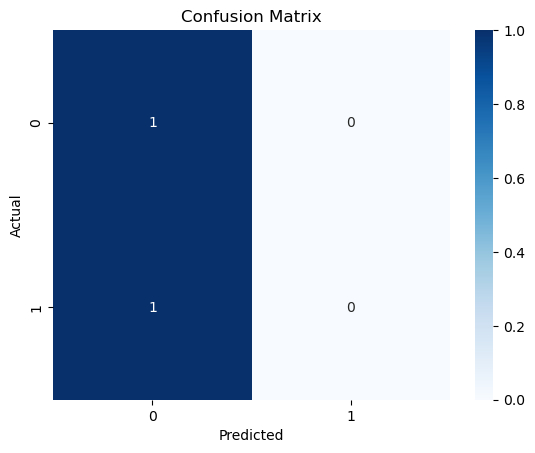


Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# Task 4: Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
